In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ds-ass/guidelines.pdf
/kaggle/input/ds-ass/dictionaries/dictionaries/~$clarity_underwriting_dictionary.xlsx
/kaggle/input/ds-ass/dictionaries/dictionaries/MoneyLion Data Scientist Assessment Data Dictionary.docx
/kaggle/input/ds-ass/dictionaries/dictionaries/clarity_underwriting_dictionary.csv
/kaggle/input/ds-ass/dictionaries/dictionaries/~$neyLion Data Scientist Assessment Data Dictionary.docx
/kaggle/input/ds-ass/dictionaries/dictionaries/clarity_underwriting_dictionary.xlsx
/kaggle/input/ds-ass/dictionaries/dictionaries/MoneyLion Data Scientist Assessment Data Dictionary.pdf
/kaggle/input/ds-ass/data/data/loan.csv
/kaggle/input/ds-ass/data/data/payment.csv
/kaggle/input/ds-ass/data/data/clarity_underwriting_variables.csv


In [2]:
def dateParser(x):
    try:
        dateparse = datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f')
    except:
        dateparse = datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')

In [3]:
loan = pd.read_csv('/kaggle/input/ds-ass/data/data/loan.csv', dtype={'originated': np.int8, 'approved': np.int8,})
# payment = pd.read_csv('/kaggle/input/ds-assessment/data/data/payment.csv', dtype={'isCollection': np.int8})
underwriting = pd.read_csv('/kaggle/input/ds-ass/data/data/clarity_underwriting_variables.csv')

/tmp/ipykernel_33/1488677643.py:3: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  underwriting = pd.read_csv('/kaggle/input/ds-ass/data/data/clarity_underwriting_variables.csv')


In [4]:
loan.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

In [5]:
main_cols = {}
underwriting.columns
for col in underwriting.columns:
    main_cols[col] = col.split('.')[-1]
#     main_cols.append(col.split('.')[-1])

underwriting = underwriting.rename(main_cols, axis=1)

In [6]:
df = pd.merge(left=loan, right=underwriting, how='right', left_on='clarityFraudId', right_on='underwritingid')
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,thirtydaysago,twentyfourhoursago,oneminuteago,onehourago,ninetydaysago,sevendaysago,tenminutesago,fifteendaysago,threesixtyfivedaysago,inquiryonfilecurrentaddressconflict,totalnumberoffraudindicators,telephonenumberinconsistentwithaddress,inquiryageyoungerthanssnissuedate,onfileaddresscautious,inquiryaddressnonresidential,onfileaddresshighrisk,ssnreportedmorefrequentlyforanother,currentaddressreportedbytradeopenlt90days,inputssninvalid,inputssnissuedatecannotbeverified,inquiryaddresscautious,morethan3inquiriesinthelast30days,onfileaddressnonresidential,creditestablishedpriortossnissuedate,driverlicenseformatinvalid,inputssnrecordedasdeceased,inquiryaddresshighrisk,inquirycurrentaddressnotonfile,bestonfilessnissuedatecannotbeverified,highprobabilityssnbelongstoanother,maxnumberofssnswithanybankaccount,bestonfilessnrecordedasdeceased,currentaddressreportedbynewtradeonly,creditestablishedbeforeage18,telephonenumberinconsistentwithstate,driverlicenseinconsistentwithonfile,workphonepreviouslylistedascellphone,workphonepreviouslylistedashomephone,ssnnamematch,nameaddressmatch,phonematchtype,ssnnamereasoncodedescription,phonematchresult,nameaddressreasoncodedescription,phonematchtypedescription,overallmatchresult,phonetype,ssndobreasoncode,ssnnamereasoncode,nameaddressreasoncode,ssndobmatch,overallmatchreasoncode,clearfraudscore,underwritingid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,partial,M,NaN,unavailable,(A8) Match to Last Name only,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,True,False,False,1.0,False,False,False,False,NaN,False,False,match,mismatch,M,NaN,unavailable,NaN,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,LL-I-04145682,956aacaf77a3cfe67557fe77f8b7db24,W,590.00,2015-10-29T11:29:16.416000,1.0,2015-10-29T14:53:22.481000,1.0,1.0,1.0,Paid Off Loan,600.0,1761.33,SC,organic,0.0,Checked,54cc0683e4b0418d9a80adb6,1.0,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,2.0,False,False,False,False,NaN,True,False,match,match,M,NaN,unavailable,NaN,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,mismatch,M,NaN,unavailable,NaN,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,LL-I-00202645,6d655fceaf71be89b0e0923409da4a2a,W,478.67,2015-01-31T00:10:21.133000,1.0,2015-02-02T18:52:53.444000,0.0,1.0,1.0,Paid Off Loan,600.0,1463.49,OH,lead,6.0,Checked,54cc1d67e4b0ba763e445b45,1.0,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,match,M,NaN,unavailable,NaN,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [7]:
df['clearfraudscore'].isnull().sum()

157

In [8]:
df = df[~df['clearfraudscore'].isna() & ~(df['loanId'].isna())]

In [9]:
df.isnull().sum()

loanId                        0
anon_ssn                      0
payFrequency                101
apr                          10
applicationDate               0
                          ...  
nameaddressreasoncode     32144
ssndobmatch                   0
overallmatchreasoncode        0
clearfraudscore               0
underwritingid                0
Length: 73, dtype: int64

In [10]:
def stringToBoolTransform(cell):
    return bool(cell)
def boolToIntTransform(cell):
    return int(cell)

cols_to_transform = ['inquiryonfilecurrentaddressconflict', 'telephonenumberinconsistentwithaddress', 'inquiryageyoungerthanssnissuedate', 'onfileaddresscautious',
                    'inquiryaddressnonresidential', 'onfileaddresshighrisk', 'ssnreportedmorefrequentlyforanother', 'currentaddressreportedbytradeopenlt90days',
                    'inputssninvalid', 'inputssnissuedatecannotbeverified', 'inquiryaddresscautious', 'morethan3inquiriesinthelast30days', 'onfileaddressnonresidential',
                    'creditestablishedpriortossnissuedate', 'driverlicenseformatinvalid', 'inputssnrecordedasdeceased', 'inquiryaddresshighrisk', 'inquirycurrentaddressnotonfile',
                    'bestonfilessnissuedatecannotbeverified', 'highprobabilityssnbelongstoanother', 'bestonfilessnrecordedasdeceased', 'currentaddressreportedbynewtradeonly',
                    'creditestablishedbeforeage18', 'telephonenumberinconsistentwithstate', 'driverlicenseinconsistentwithonfile', 'workphonepreviouslylistedascellphone',
                    'workphonepreviouslylistedashomephone']
for col in cols_to_transform:
    df[col] = df[col].apply(lambda x: stringToBoolTransform(x))
    df[col] = df[col].apply(lambda x: boolToIntTransform(x))


/tmp/ipykernel_33/1738686330.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: stringToBoolTransform(x))
/tmp/ipykernel_33/1738686330.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: boolToIntTransform(x))


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36218 entries, 2 to 54337
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   loanId                                     36218 non-null  object 
 1   anon_ssn                                   36218 non-null  object 
 2   payFrequency                               36117 non-null  object 
 3   apr                                        36208 non-null  float64
 4   applicationDate                            36218 non-null  object 
 5   originated                                 36218 non-null  float64
 6   originatedDate                             32380 non-null  object 
 7   nPaidOff                                   36216 non-null  float64
 8   approved                                   36218 non-null  float64
 9   isFunded                                   36218 non-null  float64
 10  loanStatus                 

In [12]:
sorted(dict(df.isnull().sum() * 100 / len(df)).items(), key=lambda x:x[1])[-15:]

[('loanStatus', 0.011044232149759787),
 ('apr', 0.02761058037439947),
 ('loanAmount', 0.02761058037439947),
 ('state', 0.03589375448671931),
 ('payFrequency', 0.27886686178143466),
 ('phonematchtype', 1.8913247556463637),
 ('phonematchtypedescription', 1.8913247556463637),
 ('originatedDate', 10.596940747694516),
 ('fpStatus', 10.663206140593076),
 ('ssndobreasoncode', 82.0365564084157),
 ('nameaddressreasoncodedescription', 88.75144955546966),
 ('nameaddressreasoncode', 88.75144955546966),
 ('ssnnamereasoncodedescription', 94.65459163951627),
 ('ssnnamereasoncode', 94.65459163951627),
 ('phonetype', 96.88000441769286)]

In [13]:
cols_to_drop = ['loanId', 'clarityFraudId', 'ssndobreasoncode', 'nameaddressreasoncodedescription', 'nameaddressreasoncode',
               'ssnnamereasoncodedescription', 'ssnnamereasoncode', 'phonetype']
df = df.drop(cols_to_drop, axis=1)

In [14]:
sorted(dict(df.isnull().sum() * 100 / len(df)).items(), key=lambda x:x[1])[-15:]

[('overallmatchresult', 0.0),
 ('ssndobmatch', 0.0),
 ('overallmatchreasoncode', 0.0),
 ('clearfraudscore', 0.0),
 ('underwritingid', 0.0),
 ('nPaidOff', 0.005522116074879894),
 ('loanStatus', 0.011044232149759787),
 ('apr', 0.02761058037439947),
 ('loanAmount', 0.02761058037439947),
 ('state', 0.03589375448671931),
 ('payFrequency', 0.27886686178143466),
 ('phonematchtype', 1.8913247556463637),
 ('phonematchtypedescription', 1.8913247556463637),
 ('originatedDate', 10.596940747694516),
 ('fpStatus', 10.663206140593076)]

In [15]:
df['payFrequency'].value_counts()

payFrequency
B    20982
W     9865
S     2433
M     2342
I      495
Name: count, dtype: int64

In [16]:
df['fpStatus'].value_counts()

fpStatus
Checked        26978
Rejected        4810
No Payments      265
Cancelled        171
Skipped          121
No Schedule        8
Pending            3
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36218 entries, 2 to 54337
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   anon_ssn                                   36218 non-null  object 
 1   payFrequency                               36117 non-null  object 
 2   apr                                        36208 non-null  float64
 3   applicationDate                            36218 non-null  object 
 4   originated                                 36218 non-null  float64
 5   originatedDate                             32380 non-null  object 
 6   nPaidOff                                   36216 non-null  float64
 7   approved                                   36218 non-null  float64
 8   isFunded                                   36218 non-null  float64
 9   loanStatus                                 36214 non-null  object 
 10  loanAmount                 

In [18]:
df['nPaidOff'].fillna(0, inplace=True)
df = df[~df['loanStatus'].isna()]
df['apr'].fillna(df['apr'].mean(), inplace=True)
df['loanAmount'].fillna(df['loanAmount'].mean(), inplace=True)
df.loc[df['state'].isna(), 'state'] = np.random.choice(['OH', 'IL'], df['state'].isnull().sum())
df.loc[df['payFrequency'].isna(), 'payFrequency'] = np.random.choice(['B', 'W'], df['payFrequency'].isnull().sum(), p=[0.9, 0.1])
df['phonematchtype'].fillna('M', inplace=True)
df['originatedDate'].fillna(df['applicationDate'], inplace=True)
df['fpStatus'].fillna('Checked', inplace=True)

/tmp/ipykernel_33/2622712371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nPaidOff'].fillna(0, inplace=True)
/tmp/ipykernel_33/2622712371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36214 entries, 2 to 54337
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   anon_ssn                                   36214 non-null  object 
 1   payFrequency                               36214 non-null  object 
 2   apr                                        36214 non-null  float64
 3   applicationDate                            36214 non-null  object 
 4   originated                                 36214 non-null  float64
 5   originatedDate                             36214 non-null  object 
 6   nPaidOff                                   36214 non-null  float64
 7   approved                                   36214 non-null  float64
 8   isFunded                                   36214 non-null  float64
 9   loanStatus                                 36214 non-null  object 
 10  loanAmount                 

In [20]:
df['applicationDate'] = pd.to_datetime(df['applicationDate'], format='mixed', dayfirst=True, infer_datetime_format=True)
df['originatedDate'] = pd.to_datetime(df['originatedDate'], format='mixed', dayfirst=True, infer_datetime_format=True)

/tmp/ipykernel_33/750898821.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['applicationDate'] = pd.to_datetime(df['applicationDate'], format='mixed', dayfirst=True, infer_datetime_format=True)
/tmp/ipykernel_33/750898821.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['originatedDate'] = pd.to_datetime(df['originatedDate'], format='mixed', dayfirst=True, infer_datetime_format=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36214 entries, 2 to 54337
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   anon_ssn                                   36214 non-null  object        
 1   payFrequency                               36214 non-null  object        
 2   apr                                        36214 non-null  float64       
 3   applicationDate                            36214 non-null  datetime64[ns]
 4   originated                                 36214 non-null  float64       
 5   originatedDate                             36214 non-null  datetime64[ns]
 6   nPaidOff                                   36214 non-null  float64       
 7   approved                                   36214 non-null  float64       
 8   isFunded                                   36214 non-null  float64       
 9   loanStatus            

In [22]:
df['application_date'] = df['applicationDate'].dt.date
df['originated_date'] = df['originatedDate'].dt.date

In [23]:
# df['app_orid_date_diff'] = (df['originatedDate'].astype('datetime64[ns]') - df['applicationDate'].astype('datetime64[ns]')).days

df['application_day'] = df['applicationDate'].dt.day
df['application_month'] = df['applicationDate'].dt.month
df['application_year'] = df['applicationDate'].dt.year

df['originated_day'] = df['originatedDate'].dt.day
df['originated_month'] = df['originatedDate'].dt.month
df['originated_year'] = df['originatedDate'].dt.year

In [24]:
df = df.drop(['application_date', 'originated_date', 'applicationDate', 'originatedDate'], axis=1)

In [25]:
df

,anon_ssn,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF,thirtydaysago,twentyfourhoursago,oneminuteago,onehourago,ninetydaysago,sevendaysago,tenminutesago,fifteendaysago,threesixtyfivedaysago,inquiryonfilecurrentaddressconflict,totalnumberoffraudindicators,telephonenumberinconsistentwithaddress,inquiryageyoungerthanssnissuedate,onfileaddresscautious,inquiryaddressnonresidential,onfileaddresshighrisk,ssnreportedmorefrequentlyforanother,currentaddressreportedbytradeopenlt90days,inputssninvalid,inputssnissuedatecannotbeverified,inquiryaddresscautious,morethan3inquiriesinthelast30days,onfileaddressnonresidential,creditestablishedpriortossnissuedate,driverlicenseformatinvalid,inputssnrecordedasdeceased,inquiryaddresshighrisk,inquirycurrentaddressnotonfile,bestonfilessnissuedatecannotbeverified,highprobabilityssnbelongstoanother,maxnumberofssnswithanybankaccount,bestonfilessnrecordedasdeceased,currentaddressreportedbynewtradeonly,creditestablishedbeforeage18,telephonenumberinconsistentwithstate,driverlicenseinconsistentwithonfile,workphonepreviouslylistedascellphone,workphonepreviouslylistedashomephone,ssnnamematch,nameaddressmatch,phonematchtype,phonematchresult,phonematchtypedescription,overallmatchresult,ssndobmatch,overallmatchreasoncode,clearfraudscore,underwritingid,application_day,application_month,application_year,originated_day,originated_month,originated_year
2,956aacaf77a3cfe67557fe77f8b7db24,W,590.00,1.0,1.0,1.0,1.0,Paid Off Loan,600.0,1761.33,SC,organic,0.0,Checked,1.0,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,match,match,M,unavailable,(M) Mobile Phone,match,match,1.0,572.0,54cc0683e4b0418d9a80adb6,29,10,2015,29,10,2015
4,6d655fceaf71be89b0e0923409da4a2a,W,478.67,1.0,0.0,1.0,1.0,Paid Off Loan,600.0,1463.49,OH,lead,6.0,Checked,1.0,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,0,0,match,match,M,unavailable,(M) Mobile Phone,match,match,1.0,768.0,54cc1d67e4b0ba763e445b45,31,1,2015,2,2,2015
5,e231152748a80ccd619017d44034923f,B,570.32,1.0,0.0,1.0,1.0,External Collection,400.0,1087.90,OH,lead,10.0,Checked,1.0,11.0,6.0,6.0,6.0,21.0,6.0,6.0,6.0,21.0,1,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,1,0,match,match,M,unavailable,(M) Mobile Phone,match,match,1.0,564.0,54cc38e1e4b0ba763e44dad0,31,1,2015,2,2,2015
6,8dc45100eb5a2aa7a6dcf8e82deb0902,W,681.00,1.0,0.0,1.0,1.0,External Collection,300.0,1002.86,OH,organic,0.0,Checked,1.0,6.0,3.0,3.0,3.0,8.0,5.0,3.0,5.0,18.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,match,match,M,unavailable,(M) Mobile Phone,match,match,1.0,785.0,54cce897e4b0ba763e46c138,6,5,2015,6,5,2015
7,4e4f9e943655df43f0b3d80f532ac7a9,W,478.67,1.0,0.0,1.0,1.0,Paid Off Loan,800.0,1951.32,OH,lead,10.0,Checked,1.0,5.0,5.0,2.0,3.0,5.0,5.0,2.0,5.0,8.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,1,0,0,1,0,0,match,match,M,unavailable,(M) Mobile Phone,match,match,1.0,691.0,54cd2174e4b0ba763e4b1909,31,1,2015,2,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54329,eab976064b866ef83e42ea10fa11d20c,B,360.00,1.0,0.0,1.0,1.0,New Loan,500.0,1139.89,IL,lead,10.0,Checked,1.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,7.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,1,1,match,match,M,unavailable,(M) Mobile Phone,match,match,1.0,771.0,58cc51b6e4b0b0437e1ddc64,17,3,2017,17,3,2017
54330,677f48633e18db8b568c46ae42762049,B,360.00,1.0,0.0,1.0,1.0,Internal Collection,350.0,738.42,IL,lead,25.0,Rejected,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.0,0,0,0,0,1,1,1,match,mismatch,M,unavailable,(M) Mobile Phone,partial,match,11.0,585

In [26]:
df_cat = df.select_dtypes(include='object')
df_cat

,anon_ssn,payFrequency,loanStatus,state,leadType,fpStatus,ssnnamematch,nameaddressmatch,phonematchtype,phonematchresult,phonematchtypedescription,overallmatchresult,ssndobmatch,underwritingid
2,956aacaf77a3cfe67557fe77f8b7db24,W,Paid Off Loan,SC,organic,Checked,match,match,M,unavailable,(M) Mobile Phone,match,match,54cc0683e4b0418d9a80adb6
4,6d655fceaf71be89b0e0923409da4a2a,W,Paid Off Loan,OH,lead,Checked,match,match,M,unavailable,(M) Mobile Phone,match,match,54cc1d67e4b0ba763e445b45
5,e231152748a80ccd619017d44034923f,B,External Collection,OH,lead,Checked,match,match,M,unavailable,(M) Mobile Phone,match,match,54cc38e1e4b0ba763e44dad0
6,8dc45100eb5a2aa7a6dcf8e82deb0902,W,External Collection,OH,organic,Checked,match,match,M,unavailable,(M) Mobile Phone,match,match,54cce897e4b0ba763e46c138
7,4e4f9e943655df43f0b3d80f532ac7a9,W,Paid Off Loan,OH,lead,Checked,match,match,M,unavailable,(M) Mobile Phone,match,match,54cd2174e4b0ba763e4b1909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54329,eab976064b866ef83e42ea10fa11d20c,B,New Loan,IL,lead,Checked,match,match,M,unavailable,(M) Mobile Phone,match,match,58cc51b6e4b0b0437e1ddc64
54330,677f48633e18db8b568c46ae42762049,B,Internal Collection,IL,lead,Rejected,match,mismatch,M,unavailable,(M) Mobile Phone,partial,match,58cc52c7e4b0b0437e1ee2b1
54331,bbc64dc3c0dfabc542b4753b1df599d2,B,Returned Item,IL,bvMandatory,Checked,match,mismatch,M,unavailable,(M) Mobile Phone,partial,match,58cc5577e4b0b0437e23cbcb
54335,57dadec4e647f3fb59acd32b2326611d,B,New Loan,OH,bvMandatory,Checked,match,match,M,unavailable,(M) Mobile Phone,match,match,58cc57d4e4b0b0437e278bff


In [27]:
df = df.drop(df_cat.columns, axis=1)

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [29]:
df

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,thirtydaysago,twentyfourhoursago,oneminuteago,onehourago,ninetydaysago,sevendaysago,tenminutesago,fifteendaysago,threesixtyfivedaysago,inquiryonfilecurrentaddressconflict,totalnumberoffraudindicators,telephonenumberinconsistentwithaddress,inquiryageyoungerthanssnissuedate,onfileaddresscautious,inquiryaddressnonresidential,onfileaddresshighrisk,ssnreportedmorefrequentlyforanother,currentaddressreportedbytradeopenlt90days,inputssninvalid,inputssnissuedatecannotbeverified,inquiryaddresscautious,morethan3inquiriesinthelast30days,onfileaddressnonresidential,creditestablishedpriortossnissuedate,driverlicenseformatinvalid,inputssnrecordedasdeceased,inquiryaddresshighrisk,inquirycurrentaddressnotonfile,bestonfilessnissuedatecannotbeverified,highprobabilityssnbelongstoanother,maxnumberofssnswithanybankaccount,bestonfilessnrecordedasdeceased,currentaddressreportedbynewtradeonly,creditestablishedbeforeage18,telephonenumberinconsistentwithstate,driverlicenseinconsistentwithonfile,workphonepreviouslylistedascellphone,workphonepreviouslylistedashomephone,overallmatchreasoncode,clearfraudscore,application_day,application_month,application_year,originated_day,originated_month,originated_year
2,590.00,1.0,1.0,1.0,1.0,600.0,1761.33,0.0,1.0,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,1.0,572.0,29,10,2015,29,10,2015
4,478.67,1.0,0.0,1.0,1.0,600.0,1463.49,6.0,1.0,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,0,0,1.0,768.0,31,1,2015,2,2,2015
5,570.32,1.0,0.0,1.0,1.0,400.0,1087.90,10.0,1.0,11.0,6.0,6.0,6.0,21.0,6.0,6.0,6.0,21.0,1,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,1,0,1.0,564.0,31,1,2015,2,2,2015
6,681.00,1.0,0.0,1.0,1.0,300.0,1002.86,0.0,1.0,6.0,3.0,3.0,3.0,8.0,5.0,3.0,5.0,18.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,1.0,785.0,6,5,2015,6,5,2015
7,478.67,1.0,0.0,1.0,1.0,800.0,1951.32,10.0,1.0,5.0,5.0,2.0,3.0,5.0,5.0,2.0,5.0,8.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,1,0,0,1,0,0,1.0,691.0,31,1,2015,2,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54329,360.00,1.0,0.0,1.0,1.0,500.0,1139.89,10.0,1.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,7.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,1,1,1.0,771.0,17,3,2017,17,3,2017
54330,360.00,1.0,0.0,1.0,1.0,350.0,738.42,25.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.0,0,0,0,0,1,1,1,11.0,585.0,17,3,2017,17,3,2017
54331,360.00,1.0,0.0,1.0,1.0,350.0,792.03,3.0,1.0,11.0,11.0,1.0,11.0,11.0,11.0,11.0,11.0,14.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,1,1,11.0,582.0,17,3,2017,17,3,2017
54335,681.00,1.0,0.0,1.0,1.0,300.0,1016.36,3.0,1.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,5.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0,0,1,1,1,1.0,576.0,17,3,2017,17,3,2017


In [30]:
df_cat = df_cat.apply(LabelEncoder().fit_transform)

In [31]:
df = pd.concat([df, df_cat], axis=1)

In [32]:
df

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,thirtydaysago,twentyfourhoursago,oneminuteago,onehourago,ninetydaysago,sevendaysago,tenminutesago,fifteendaysago,threesixtyfivedaysago,inquiryonfilecurrentaddressconflict,totalnumberoffraudindicators,telephonenumberinconsistentwithaddress,inquiryageyoungerthanssnissuedate,onfileaddresscautious,inquiryaddressnonresidential,onfileaddresshighrisk,ssnreportedmorefrequentlyforanother,currentaddressreportedbytradeopenlt90days,inputssninvalid,inputssnissuedatecannotbeverified,inquiryaddresscautious,morethan3inquiriesinthelast30days,onfileaddressnonresidential,creditestablishedpriortossnissuedate,driverlicenseformatinvalid,inputssnrecordedasdeceased,inquiryaddresshighrisk,inquirycurrentaddressnotonfile,bestonfilessnissuedatecannotbeverified,highprobabilityssnbelongstoanother,maxnumberofssnswithanybankaccount,bestonfilessnrecordedasdeceased,currentaddressreportedbynewtradeonly,creditestablishedbeforeage18,telephonenumberinconsistentwithstate,driverlicenseinconsistentwithonfile,workphonepreviouslylistedascellphone,workphonepreviouslylistedashomephone,overallmatchreasoncode,clearfraudscore,application_day,application_month,application_year,originated_day,originated_month,originated_year,anon_ssn,payFrequency,loanStatus,state,leadType,fpStatus,ssnnamematch,nameaddressmatch,phonematchtype,phonematchresult,phonematchtypedescription,overallmatchresult,ssndobmatch,underwritingid
2,590.00,1.0,1.0,1.0,1.0,600.0,1761.33,0.0,1.0,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,1.0,572.0,29,10,2015,29,10,2015,17962,4,8,31,6,1,0,1,5,4,5,0,1,0
4,478.67,1.0,0.0,1.0,1.0,600.0,1463.49,6.0,1.0,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,0,0,1.0,768.0,31,1,2015,2,2,2015,13111,4,8,27,4,1,0,1,5,4,5,0,1,1
5,570.32,1.0,0.0,1.0,1.0,400.0,1087.90,10.0,1.0,11.0,6.0,6.0,6.0,21.0,6.0,6.0,6.0,21.0,1,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,1,0,1.0,564.0,31,1,2015,2,2,2015,27257,0,5,27,4,1,0,1,5,4,5,0,1,2
6,681.00,1.0,0.0,1.0,1.0,300.0,1002.86,0.0,1.0,6.0,3.0,3.0,3.0,8.0,5.0,3.0,5.0,18.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,1.0,785.0,6,5,2015,6,5,2015,17036,4,5,27,6,1,0,1,5,4,5,0,1,3
7,478.67,1.0,0.0,1.0,1.0,800.0,1951.32,10.0,1.0,5.0,5.0,2.0,3.0,5.0,5.0,2.0,5.0,8.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,1,0,0,1,0,0,1.0,691.0,31,1,2015,2,2,2015,9319,4,8,27,4,1,0,1,5,4,5,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54329,360.00,1.0,0.0,1.0,1.0,500.0,1139.89,10.0,1.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,7.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,1,1,1.0,771.0,17,3,2017,17,3,2017,28231,0,7,12,4,1,0,1,5,4,5,0,1,31652
54330,360.00,1.0,0.0,1.0,1.0,350.0,738.42,25.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.0,0,0,0,0,1,1,1,11.0,585.0,17,3,2017,17,3,2017,12365,0,6,12,4,5,0,2,5,4,5,3,1,31653
54331,360.00,1.0,0.0,1.0,1.0,350.0,792.03,3.0,1.0,11.0,11.0,1.0,11.0,11.0,11.0,11.0,11.0,14.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,1,1,11.0,582.0,17,3,2017,17,3,2017,22598,0,11,12,0,1,0,2,5,4,5,3,1,31654
54335,681.00,1.0,0.0,1.0,1.0,300.0,1016.36,3.0,1.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,5.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0,0,1,1,1,1.0,576.0,17,3,2017,17,3,2017,10450,0,7,27,0,1,0,1,5,4,5,0,1,31655


<Axes: >

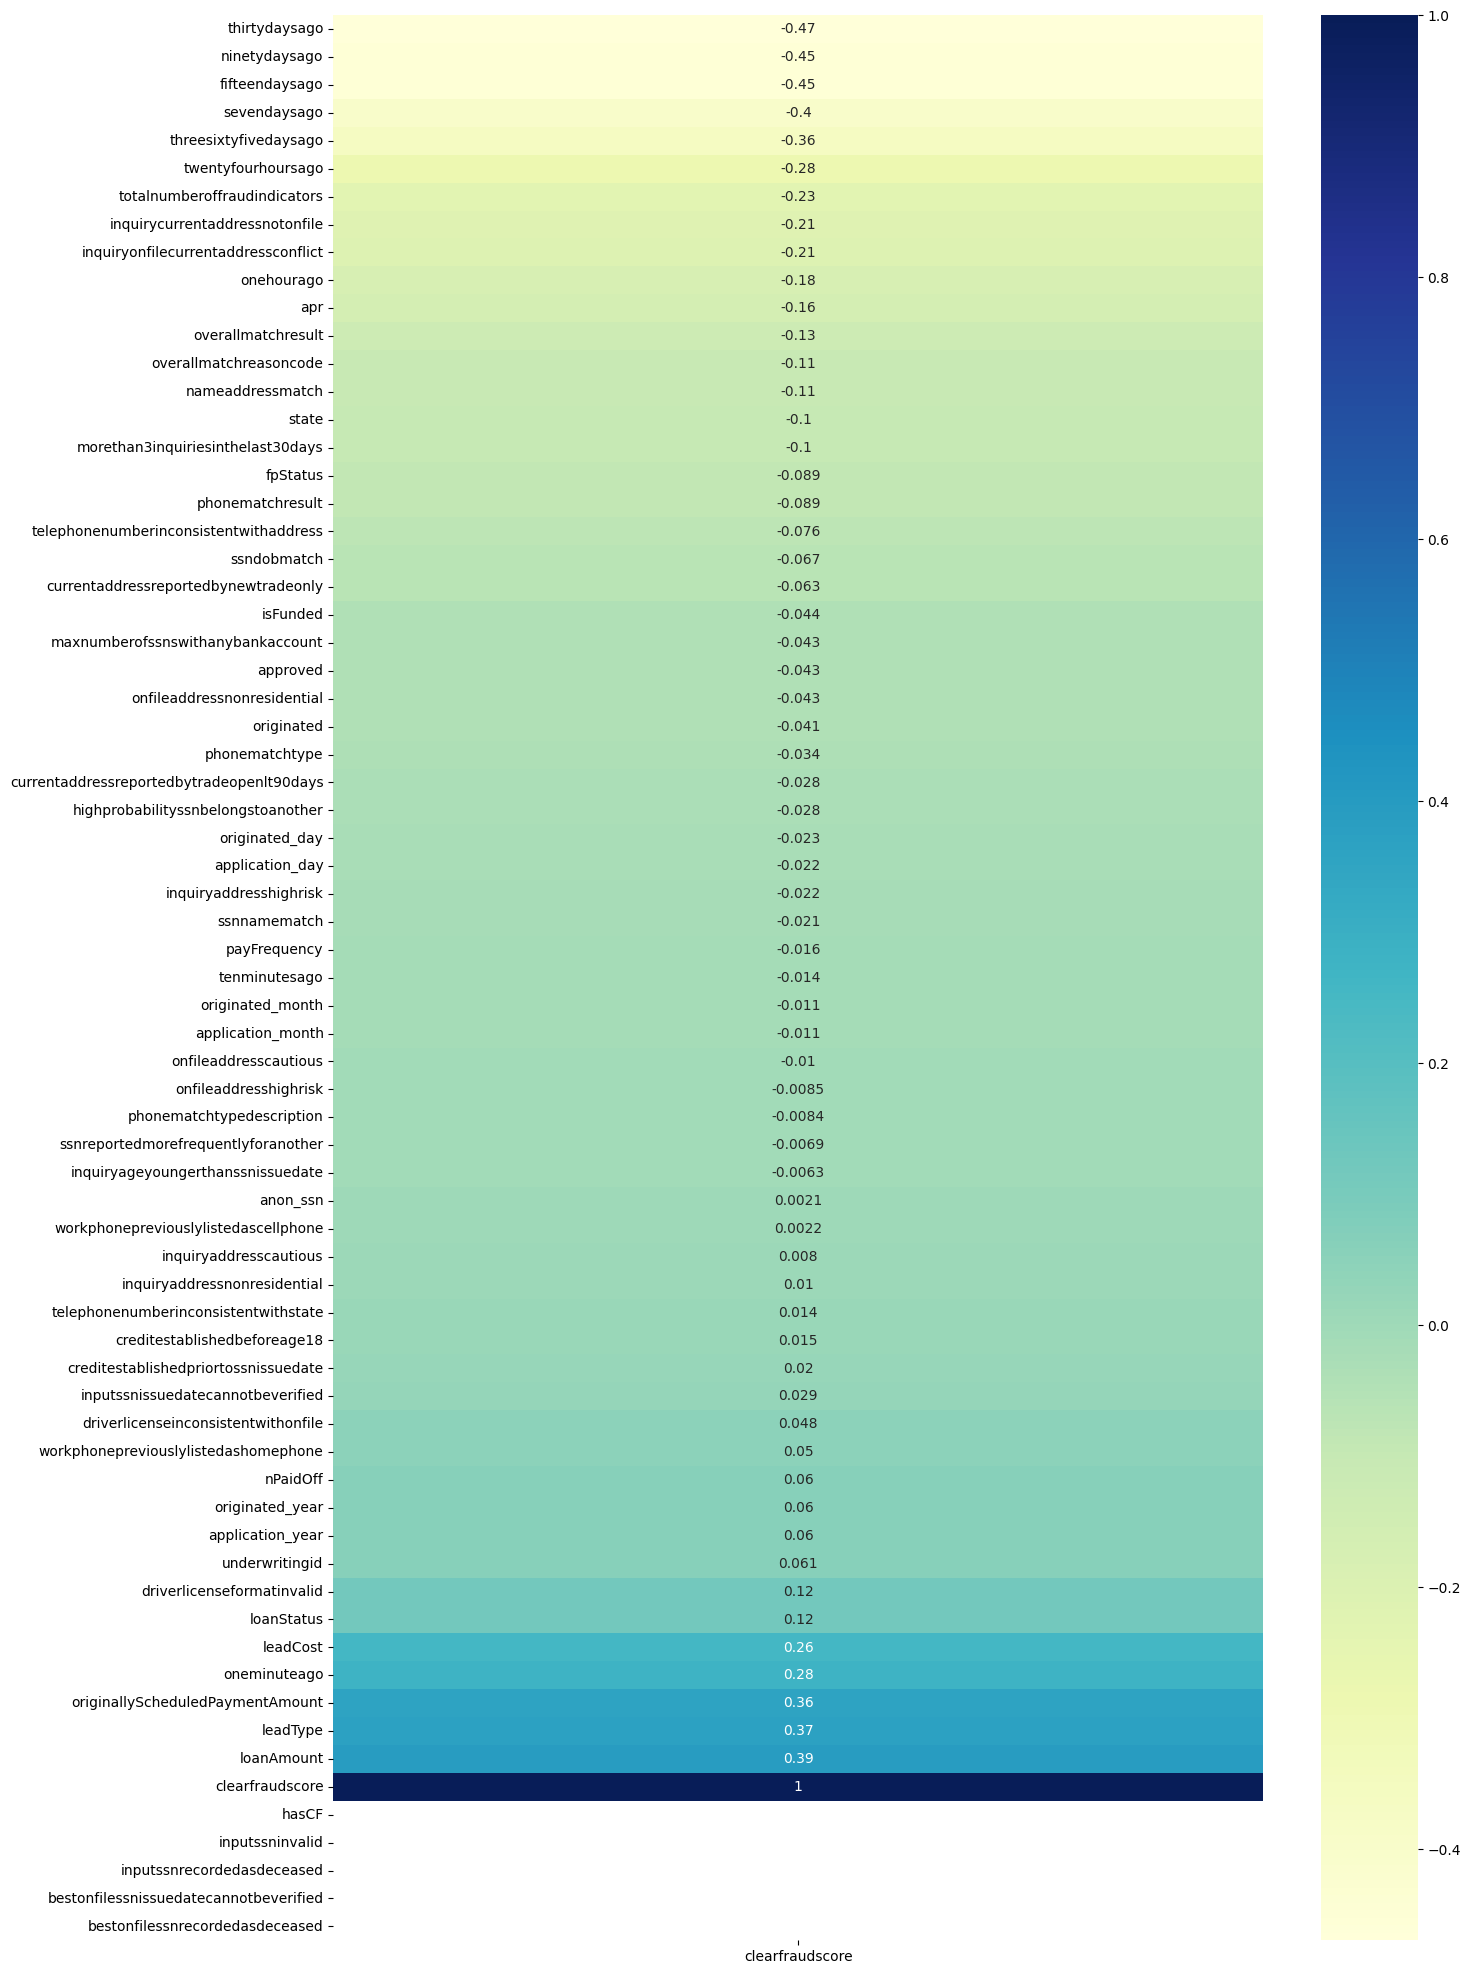

In [33]:
f, ax = plt.subplots(figsize=(15, 25))
sns.heatmap(data=df.corr()[['clearfraudscore']].sort_values(by='clearfraudscore'),
            cmap="YlGnBu", annot=True, ax=ax)

Time for some interpretations:
* Clear fraud score is highly positively correlated to the loan amount, So further drill down b/w these 2 features would be interesting.
* Clear fraud score is also highly positively correlated to the lead type attribute, So this is a good starting point to visualize what's going on between those 2 variables.
* As we know from the data, that Loan amount and Originally scheduled payment amount are almost correlated by 1 it's obvious that if loan amount is correlated with fraud score then so would be origSchedPayAmt. And so it would not be surprizing if we ended up dropping one of these feature in the final model training. 
* No. of unique enquiries one minute ago also looks like a strong indicator of wether a person would default or not 
* Last but not the least in the positive correlation, lead cost should be one of the feature we should drill down to check what impact this makes over fraud detection prediction. 

* No. of unique enquiry indicators are suggesting something fishy going on, espicially the 30, 90, 15 and 7 days ago enquiry. So based on the correlation matrix, If the number of unique enquiries N-days ago was high then according to the corr matrix, the clearfraudscore would be low meaning that the customer has a high default risk. 

* Inquiry current address not on file and Inquiry current address conflict are some strong indicators that if there is address miss match or address null, then the client has more probability of defaulting. 



Text(0, 0.5, 'Loan Amount')

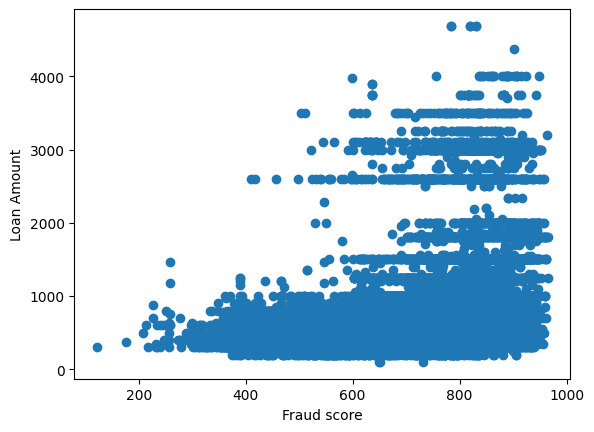

In [34]:
plt.scatter(df['clearfraudscore'], df['loanAmount'])

plt.xlabel("Fraud score")
plt.ylabel("Loan Amount")

The above graph is not very intuitive. Let's try something else

Text(0, 0.5, 'Loan Amount')

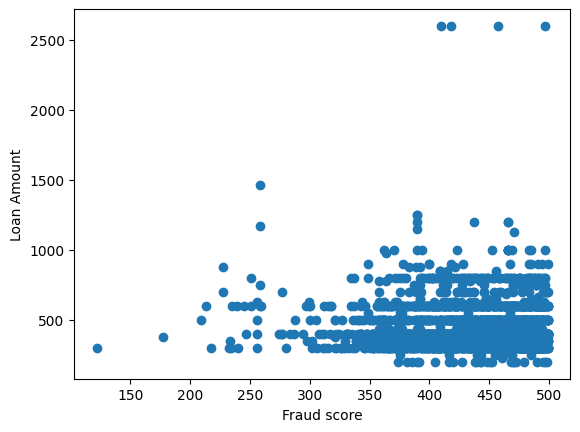

In [35]:
adp = df[df['clearfraudscore'] < 500]

plt.scatter(adp['clearfraudscore'], adp['loanAmount'])

plt.xlabel("Fraud score")
plt.ylabel("Loan Amount")

Okay, So from this graph we could conclude that basically majority of defaulting a.k.a having lower fraud score is majorly from the lower loan amount range, meaning that atleast the exsiting system in place is doing a good job of preventing the fraud when the loan amount is high.

This and the above graph is also indicative of the fact that as the loan amount increases, the fraud score increases as well meaning lower the risk of fraud, keeping all the other factors constant. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


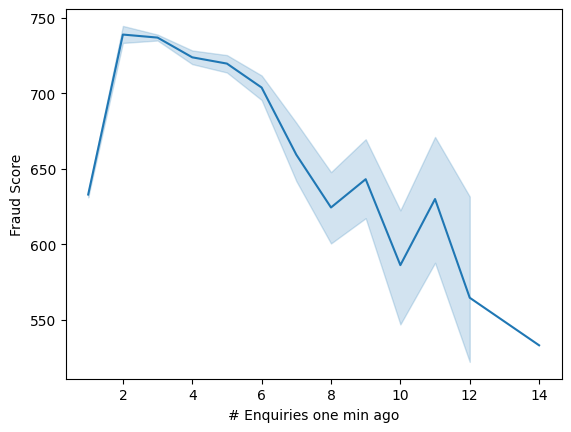

In [36]:
sns.lineplot(df[['oneminuteago', 'clearfraudscore']], x='oneminuteago', y='clearfraudscore')

plt.xlabel("# Enquiries one min ago")
plt.ylabel("Fraud Score")
plt.show()

From the graph it's clear that the defaulting client inquired a lot many times than the un-defaulting client. 
This shows that the client who's going to commit a fraud was in some sort of urgency, which would be depicted by his behaviour. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


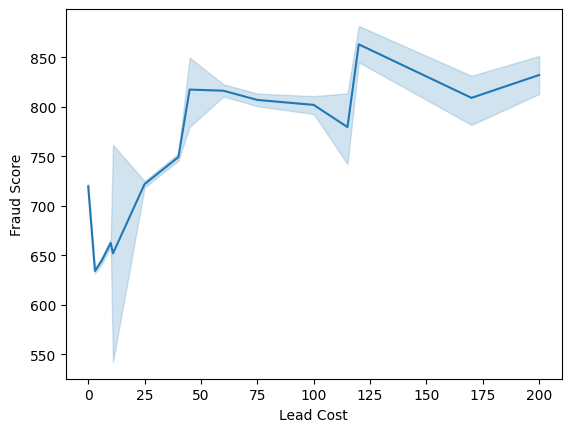

In [37]:
sns.lineplot(df[['leadCost', 'clearfraudscore']], x='leadCost', y='clearfraudscore')

plt.xlabel("Lead Cost")
plt.ylabel("Fraud Score")
plt.show()

If we want to compare 2 different types of population sample based on the lead cost then basically the population which has a higher lead cost are comparitively less defaulting than the one which has a lower lead cost. This also depicts the fact that our advertising campaings for capturing the leads are working well since we're able to capture good/non-defaulting clients even at a cost of a bit higher expenditure. 

The graph also shows us that there is a sweet spot at a cost of 50-75 range which the advertising team should target because beyond increasing the cost of a lead, there is no significant increase in the fraud score. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


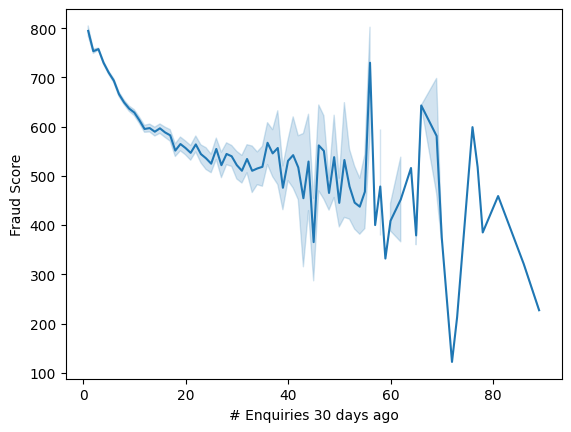

In [38]:
sns.lineplot(df[['thirtydaysago', 'clearfraudscore']], x='thirtydaysago', y='clearfraudscore')

plt.xlabel("# Enquiries 30 days ago")
plt.ylabel("Fraud Score")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


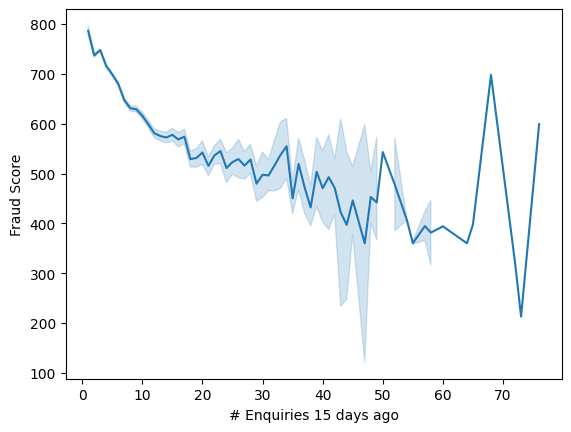

In [39]:
sns.lineplot(df[['fifteendaysago', 'clearfraudscore']], x='fifteendaysago', y='clearfraudscore')

plt.xlabel("# Enquiries 15 days ago")
plt.ylabel("Fraud Score")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


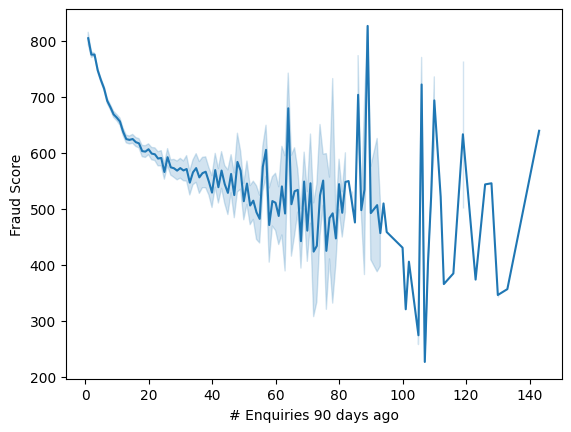

In [40]:
sns.lineplot(df[['ninetydaysago', 'clearfraudscore']], x='ninetydaysago', y='clearfraudscore')

plt.xlabel("# Enquiries 90 days ago")
plt.ylabel("Fraud Score")
plt.show()

Every inquiry attribute plotted above shows a downward trend as the number of inquiries increases. Nothing much else to infer from these graphs.

One thinng to note is that, basically what was 1 min ago inquiry would be sometime become a part of 1 hour inquiry and eventually become a part of 30, 60, 90 day enquiry. So the trend basically shows that. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


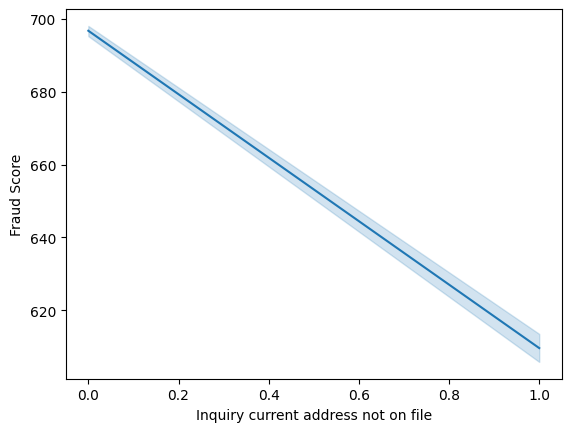

In [41]:
sns.lineplot(df[['inquirycurrentaddressnotonfile', 'clearfraudscore']],
             x='inquirycurrentaddressnotonfile', y='clearfraudscore')

plt.xlabel("Inquiry current address not on file")
plt.ylabel("Fraud Score")
plt.show()

Easy Interpretation: The clients who's address is not present in records are more likely to default than the ones who's address is present on record. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


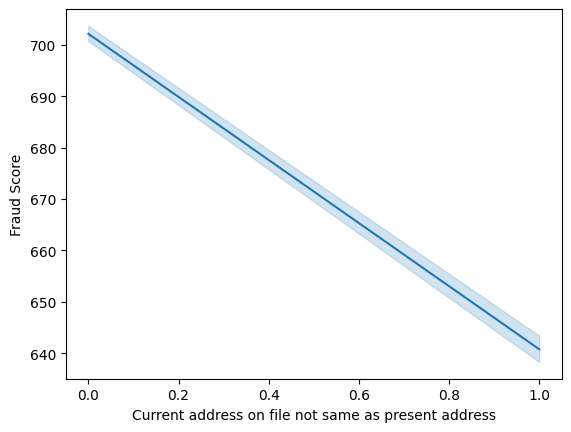

In [42]:
sns.lineplot(df[['inquiryonfilecurrentaddressconflict', 'clearfraudscore']],
             x='inquiryonfilecurrentaddressconflict', y='clearfraudscore')

plt.xlabel("Current address on file not same as present address")
plt.ylabel("Fraud Score")
plt.show()

Easy Interpretation: The clients who's current address is not same as thier present residing address are more likely to default than the ones who's current address is updated as thier residing address. 

That Ends the interpretation section, Let's move on to feature engineering and then model building. 

In [43]:
df

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,thirtydaysago,twentyfourhoursago,oneminuteago,onehourago,ninetydaysago,sevendaysago,tenminutesago,fifteendaysago,threesixtyfivedaysago,inquiryonfilecurrentaddressconflict,totalnumberoffraudindicators,telephonenumberinconsistentwithaddress,inquiryageyoungerthanssnissuedate,onfileaddresscautious,inquiryaddressnonresidential,onfileaddresshighrisk,ssnreportedmorefrequentlyforanother,currentaddressreportedbytradeopenlt90days,inputssninvalid,inputssnissuedatecannotbeverified,inquiryaddresscautious,morethan3inquiriesinthelast30days,onfileaddressnonresidential,creditestablishedpriortossnissuedate,driverlicenseformatinvalid,inputssnrecordedasdeceased,inquiryaddresshighrisk,inquirycurrentaddressnotonfile,bestonfilessnissuedatecannotbeverified,highprobabilityssnbelongstoanother,maxnumberofssnswithanybankaccount,bestonfilessnrecordedasdeceased,currentaddressreportedbynewtradeonly,creditestablishedbeforeage18,telephonenumberinconsistentwithstate,driverlicenseinconsistentwithonfile,workphonepreviouslylistedascellphone,workphonepreviouslylistedashomephone,overallmatchreasoncode,clearfraudscore,application_day,application_month,application_year,originated_day,originated_month,originated_year,anon_ssn,payFrequency,loanStatus,state,leadType,fpStatus,ssnnamematch,nameaddressmatch,phonematchtype,phonematchresult,phonematchtypedescription,overallmatchresult,ssndobmatch,underwritingid
2,590.00,1.0,1.0,1.0,1.0,600.0,1761.33,0.0,1.0,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,1.0,572.0,29,10,2015,29,10,2015,17962,4,8,31,6,1,0,1,5,4,5,0,1,0
4,478.67,1.0,0.0,1.0,1.0,600.0,1463.49,6.0,1.0,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,0,0,1.0,768.0,31,1,2015,2,2,2015,13111,4,8,27,4,1,0,1,5,4,5,0,1,1
5,570.32,1.0,0.0,1.0,1.0,400.0,1087.90,10.0,1.0,11.0,6.0,6.0,6.0,21.0,6.0,6.0,6.0,21.0,1,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,1,1,0,1.0,564.0,31,1,2015,2,2,2015,27257,0,5,27,4,1,0,1,5,4,5,0,1,2
6,681.00,1.0,0.0,1.0,1.0,300.0,1002.86,0.0,1.0,6.0,3.0,3.0,3.0,8.0,5.0,3.0,5.0,18.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0,0,0,0,1,1,0,1.0,785.0,6,5,2015,6,5,2015,17036,4,5,27,6,1,0,1,5,4,5,0,1,3
7,478.67,1.0,0.0,1.0,1.0,800.0,1951.32,10.0,1.0,5.0,5.0,2.0,3.0,5.0,5.0,2.0,5.0,8.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,1,0,0,1,0,0,1.0,691.0,31,1,2015,2,2,2015,9319,4,8,27,4,1,0,1,5,4,5,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54329,360.00,1.0,0.0,1.0,1.0,500.0,1139.89,10.0,1.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,7.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,1,1,1.0,771.0,17,3,2017,17,3,2017,28231,0,7,12,4,1,0,1,5,4,5,0,1,31652
54330,360.00,1.0,0.0,1.0,1.0,350.0,738.42,25.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.0,0,0,0,0,1,1,1,11.0,585.0,17,3,2017,17,3,2017,12365,0,6,12,4,5,0,2,5,4,5,3,1,31653
54331,360.00,1.0,0.0,1.0,1.0,350.0,792.03,3.0,1.0,11.0,11.0,1.0,11.0,11.0,11.0,11.0,11.0,14.0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,1,1,11.0,582.0,17,3,2017,17,3,2017,22598,0,11,12,0,1,0,2,5,4,5,3,1,31654
54335,681.00,1.0,0.0,1.0,1.0,300.0,1016.36,3.0,1.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,5.0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0,0,1,1,1,1.0,576.0,17,3,2017,17,3,2017,10450,0,7,27,0,1,0,1,5,4,5,0,1,31655


In [74]:
from sklearn.model_selection import train_test_split
X = df.drop(['clearfraudscore'], axis=1)
Y = df['clearfraudscore']
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=42)

In [75]:
print((train_x.shape, test_x.shape, train_y.shape, test_y.shape))

((27160, 68), (9054, 68), (27160,), (9054,))


In [76]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [77]:
train_x

array([[-1.32956114,  0.3415239 , -0.32595843, ..., -1.54041422,
        -0.32227596, -0.32131434],
       [ 0.927071  ,  0.3415239 , -0.32595843, ...,  0.65367634,
         2.32493867, -1.26773777],
       [ 0.73253374,  0.3415239 , -0.32595843, ...,  0.65367634,
        -0.32227596, -1.23150947],
       ...,
       [-0.62930484,  0.3415239 , -0.32595843, ...,  0.65367634,
        -0.32227596, -0.67900045],
       [-1.87426545,  0.3415239 , -0.32595843, ...,  0.65367634,
        -0.32227596, -1.58864832],
       [ 0.46018159,  0.3415239 , -0.32595843, ...,  0.65367634,
        -0.32227596, -0.23835043]])

In [78]:
test_x

array([[ 0.46018159,  0.3415239 ,  1.11075544, ...,  0.65367634,
        -0.32227596, -0.92745438],
       [-0.22848029, -2.92805279,  1.11075544, ..., -1.54041422,
        -0.32227596, -1.38671109],
       [ 0.46018159,  0.3415239 , -0.32595843, ...,  0.65367634,
        -0.32227596, -1.06952188],
       ...,
       [ 0.46018159,  0.3415239 , -0.32595843, ...,  0.65367634,
        -0.32227596, -1.14974951],
       [ 0.46018159,  0.3415239 , -0.32595843, ...,  0.65367634,
         2.32493867,  0.07216227],
       [-1.32956114,  0.3415239 ,  1.11075544, ...,  0.65367634,
        -0.32227596, -1.15500317]])

In [79]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=15)
# train_x = pca.fit_transform(train_x)
# test_x = pca.fit_transform(test_x)

In [80]:
print(train_x.shape, test_x.shape)

(27160, 68) (9054, 68)


In [81]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [82]:
lr = LinearRegression()
lr.fit(train_x, train_y)
pred_lr = lr.predict(test_x)
print(mean_squared_error(pred_lr, test_y))
print(r2_score(pred_lr, test_y))

8615.274986317549
-0.17684073496411967


In [83]:
dtr = DecisionTreeRegressor()
dtr.fit(train_x, train_y)
pred_dtr = dtr.predict(test_x)
print(mean_squared_error(pred_dtr, test_y))
print(r2_score(pred_dtr, test_y))

13620.977137176938
0.17087613149074576


In [84]:
# svr = SVR()
# svr.fit(train_x, train_y)
# pred_svr = svr.predict(test_x)
# print(mean_squared_error(pred_svr, test_y))
# print(r2_score(pred_svr, test_y))

In [85]:
rfr = RandomForestRegressor()
rfr.fit(train_x, train_y)
pred_rfr = rfr.predict(test_x)
print(mean_squared_error(pred_rfr, test_y))
print(r2_score(pred_rfr, test_y))

6426.604642953391
0.2835295963599923


In [89]:
xgb = GradientBoostingRegressor()
xgb.fit(train_x, train_y)
pred_xgb = xgb.predict(test_x)
print(mean_squared_error(pred_xgb, test_y))
print(r2_score(pred_xgb, test_y))

6614.095278777957
0.21493779085887643


In [87]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [91]:
sfs1 = sfs(xgb, k_features=20, forward=True, verbose=2, scoring='r2', cv=5, n_jobs=-1)
sfs1.fit(train_x, train_y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:   40.4s finished

[2024-08-17 11:38:50] Features: 1/20 -- score: 0.28930745653745576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:  1.1min finished

[2024-08-17 11:39:57] Features: 2/20 -- score: 0.4466167775596759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:  1.6min finished

[2024-08-17 11:41:32] Features: 3/20 -- score: 0.49539086685611566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  65 out

SequentialFeatureSelector(estimator=GradientBoostingRegressor(),
                          k_features=(20, 20), n_jobs=-1, scoring='r2',
                          verbose=2)

In [92]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['5', '7', '11', '13', '15', '16', '17', '18', '24', '30', '36', '46', '47', '49', '55', '56', '57', '58', '64', '67']


In [99]:
k_feat = list(map(lambda x: int(x), feat_names))

In [101]:
k_columns = df.columns[k_feat]

In [136]:
k_columns

Index(['loanAmount', 'leadCost', 'oneminuteago', 'ninetydaysago',
       'tenminutesago', 'fifteendaysago', 'threesixtyfivedaysago',
       'inquiryonfilecurrentaddressconflict', 'onfileaddresshighrisk',
       'morethan3inquiriesinthelast30days', 'inquirycurrentaddressnotonfile',
       'workphonepreviouslylistedashomephone', 'overallmatchreasoncode',
       'application_day', 'anon_ssn', 'payFrequency', 'loanStatus', 'state',
       'phonematchresult', 'ssndobmatch'],
      dtype='object')

In [104]:
k_df = df[k_columns]
k_df

,loanAmount,leadCost,oneminuteago,ninetydaysago,tenminutesago,fifteendaysago,threesixtyfivedaysago,inquiryonfilecurrentaddressconflict,onfileaddresshighrisk,morethan3inquiriesinthelast30days,inquirycurrentaddressnotonfile,workphonepreviouslylistedashomephone,overallmatchreasoncode,application_day,anon_ssn,payFrequency,loanStatus,state,phonematchresult,ssndobmatch
2,600.0,0.0,2.0,10.0,2.0,9.0,25.0,0,0,0,0,0,1.0,29,17962,4,8,31,4,1
4,600.0,6.0,2.0,6.0,2.0,5.0,6.0,0,0,0,0,0,1.0,31,13111,4,8,27,4,1
5,400.0,10.0,6.0,21.0,6.0,6.0,21.0,1,0,0,0,0,1.0,31,27257,0,5,27,4,1
6,300.0,0.0,3.0,8.0,3.0,5.0,18.0,0,0,0,0,0,1.0,6,17036,4,5,27,4,1
7,800.0,10.0,2.0,5.0,2.0,5.0,8.0,0,0,0,0,0,1.0,31,9319,4,8,27,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54329,500.0,10.0,3.0,6.0,3.0,3.0,7.0,0,0,0,0,1,1.0,17,28231,0,7,12,4,1
54330,350.0,25.0,5.0,5.0,5.0,5.0,9.0,0,0,0,0,1,11.0,17,12365,0,6,12,4,1
54331,350.0,3.0,1.0,11.0,11.0,11.0,14.0,0,0,0,0,1,11.0,17,22598,0,11,12,4,1
54335,300.0,3.0,1.0,4.0,1.0,4.0,5.0,0,0,0,0,1,1.0,17,10450,0,7,27,4,1


In [105]:
k_train = k_df
k_test = df['clearfraudscore']

k_train_x, k_test_x, k_train_y, k_test_y = train_test_split(k_train, k_test, test_size=0.25)

In [107]:
k_train_x = ss.fit_transform(k_train_x)
k_test_x = ss.transform(k_test_x)

xgb.fit(k_train_x, k_train_y)
pred = xgb.predict(k_test_x)

In [123]:
# pd.DataFrame(columns={'true': k_test_y.reset_index(drop=True), 'pred': pd.Series(pred)})

,true,pred


In [128]:
prediction = pd.DataFrame()
prediction['true'] = k_test_y.reset_index(drop=True)
prediction['pred'] = pred

In [127]:
prediction

,true,pred
0,767.0,742.578939
1,705.0,519.738047
2,762.0,678.537979
3,636.0,688.710266
4,595.0,581.354445
...,...,...
9049,479.0,649.463527
9050,604.0,698.008572
9051,858.0,773.918197
9052,555.0,599.777498


In [129]:
prediction['diff'] = abs(prediction['true'] - prediction['pred'])

In [130]:
prediction

,true,pred,diff
0,767.0,742.578939,24.421061
1,705.0,519.738047,185.261953
2,762.0,678.537979,83.462021
3,636.0,688.710266,52.710266
4,595.0,581.354445,13.645555
...,...,...,...
9049,479.0,649.463527,170.463527
9050,604.0,698.008572,94.008572
9051,858.0,773.918197,84.081803
9052,555.0,599.777498,44.777498


In [131]:
prediction.sample(100)

,true,pred,diff
2201,683.0,711.296569,28.296569
4606,589.0,682.258557,93.258557
8653,743.0,656.811806,86.188194
1075,875.0,695.611118,179.388882
3738,602.0,651.002768,49.002768
...,...,...,...
1978,651.0,688.449278,37.449278
2037,494.0,634.882685,140.882685
1685,847.0,825.305026,21.694974
5530,828.0,755.258365,72.741635


In [133]:
prediction['diff'].describe()

count    9054.000000
mean       65.313384
std        49.871285
min         0.014323
25%        25.865486
50%        55.201108
75%        93.942542
max       361.372099
Name: diff, dtype: float64